In [1]:
%matplotlib inline
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.
/home/admin/miniconda3/envs/da03/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/admin/miniconda3/envs/da03/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/admin/miniconda3/envs/da03/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/admin/miniconda3/env

In [2]:
np.finfo(np.float32).eps, np.sqrt(np.finfo(np.float32).eps), np.power(np.finfo(np.float32).eps, 0.7)

(1.1920929e-07, 0.00034526698, 1.4236953606213502e-05)

In [3]:
np.finfo(np.float64).eps, np.sqrt(np.finfo(np.float64).eps)

(2.220446049250313e-16, 1.4901161193847656e-08)

In [4]:
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib')
from keras_ex.gkernel import GaussianKernel, GaussianKernel2, GaussianKernel3
from keras_ex.gkernel.sklearn import (
    RBFClassifier, RBFRegressor,
    make_model_gkernel3,
    make_model_gkernel2,
    make_model_gkernel1,
    make_model_out,
    make_model
)

In [5]:
from sklearn import preprocessing

iris = datasets.load_iris()
X = iris.data.astype(np.float32)
X = preprocessing.scale(X)
Y = iris.target
N = Y.size
Y2 = keras.utils.to_categorical(Y, num_classes=3)

index = np.arange(N)
xtrain = X[index[index % 2 != 0],:]
ytrain = Y2[index[index % 2 != 0]]
xtest = X[index[index % 2 == 0],:]
yans = Y2[index[index % 2 == 0]]

/home/admin/miniconda3/envs/da03/lib/python3.6/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/admin/miniconda3/envs/da03/lib/python3.6/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [6]:
#lm, model_gkernel = make_model_gkernel2()
lm, model_gkernel = make_model_gkernel3()
print(model_gkernel.inputs[0])
model_gkernel.summary()






Tensor("inp:0", shape=(?, 4), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
gkernel (GaussianKernel3)    (None, 2)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_out = make_model_out()
model_out.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = make_model(nn=4, num_cls=3, make_model_gkernel=make_model_gkernel3)
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 2)                 9         
_________________________________________________________________
model_out (Model)            (None, 3)                 9         
Total params: 18
Trainable params: 9
Non-trainable params: 9
_________________________________________________________________


In [9]:
model.fit(xtrain, ytrain, epochs=5, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
 - 0s - loss: 1.1617 - acc: 0.4267
Epoch 2/5
 - 0s - loss: 1.0987 - acc: 0.2933
Epoch 3/5
 - 0s - loss: 1.0545 - acc: 0.3200
Epoch 4/5
 - 0s - loss: 1.0194 - acc: 0.3067
Epoch 5/5
 - 0s - loss: 0.9867 - acc: 0.3600


In [10]:
pred = model.predict(xtrain)
pred[:5]

array([[0.34511355, 0.26485896, 0.39002746],
       [0.34956664, 0.26156926, 0.38886413],
       [0.34183988, 0.26645523, 0.39170495],
       [0.34223387, 0.26674467, 0.39102143],
       [0.34593529, 0.26421705, 0.38984767]], dtype=float32)

In [11]:
np.random.choice(np.arange(xtrain.shape[0]), 3)

array([21, 20, 41])

In [12]:
model.save('saved_model')

In [13]:
ls -la

合計 12736
drwxrwxr-x. 3 admin admin    4096 10月 14 22:23 ./
drwxrwxr-x. 7 admin admin    4096  9月 16 10:46 ../
drwxr-xr-x. 2 admin admin    4096 10月 14 17:03 .ipynb_checkpoints/
-rw-rw-r--. 1 admin admin  392990 10月 13 17:39 dev3_001-iris.ipynb
-rw-rw-r--. 1 admin admin  986980 10月 14 22:21 dev_001-iris.ipynb
-rw-rw-r--. 1 admin admin  297245 10月 12 01:29 dev_002-digits8.ipynb
-rw-rw-r--. 1 admin admin 1606584 10月 14 22:23 dev_003-moon.ipynb
-rw-rw-r--. 1 admin admin 1483134 10月 14 18:16 dev_004-moon2.ipynb
-rw-rw-r--. 1 admin admin   19005 10月 14 18:38 dev_005-digits28-SVM.ipynb
-rw-rw-r--. 1 admin admin  150961 10月  9 22:59 dev_005-digits28-stacking01-Copy1.ipynb
-rw-rw-r--. 1 admin admin   52714 10月  9 23:49 dev_005-digits28-stacking01.ipynb
-rw-rw-r--. 1 admin admin  243915 10月 14 22:16 dev_005-digits28.ipynb
-rw-rw-r--. 1 admin admin  836300 10月  7 22:51 dev_006-Hyperbola_dim2.ipynb
-rw-rw-r--. 1 admin admin   80077 10月  9 23:27 dev_007-regression.ipynb
-rw-rw-r--. 1 admin admin 62

In [14]:
from keras.models import load_model

In [15]:
# load_model('saved_model', custom_objects={'GaussianKernel2': GaussianKernel2})
m = load_model('saved_model', custom_objects={'GaussianKernel3': GaussianKernel3})

/home/admin/miniconda3/envs/da03/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [16]:
pred = m.predict(xtrain)
pred[:5]

array([[0.34511355, 0.26485896, 0.39002746],
       [0.34956664, 0.26156926, 0.38886413],
       [0.34183988, 0.26645523, 0.39170495],
       [0.34223387, 0.26674467, 0.39102143],
       [0.34593529, 0.26421705, 0.38984767]], dtype=float32)

## Getting Started

In [17]:
'''
number of landmarks is 15
'''
clf = RBFClassifier(
    num_lm=15,
    lm_select_from_x=True
)

In [18]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=50, verbose=0)

CPU times: user 2.73 s, sys: 51.9 ms, total: 2.78 s
Wall time: 2.52 s


In [19]:
clf.sk_params

{'num_lm': 15,
 'lm_select_from_x': True,
 'num_cls': 3,
 'nn': None,
 'lr': None,
 'callbacks': None,
 'lm': None,
 'epochs_warmup': 10,
 'loss': None}

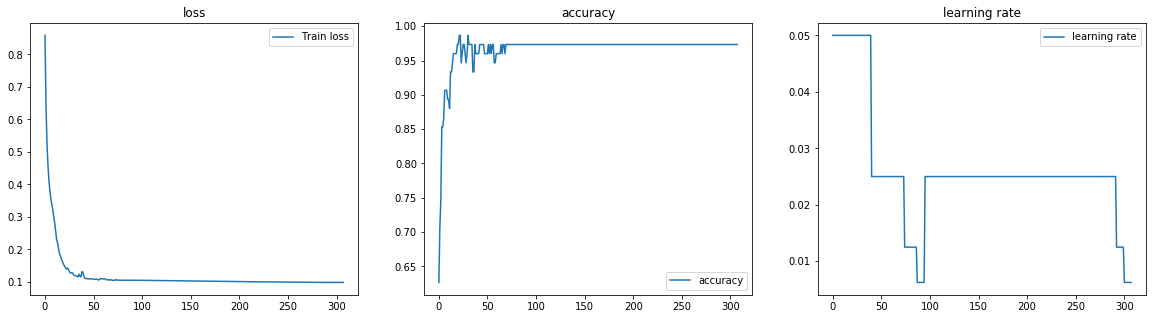

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [21]:
'''
trained gamma
'''
clf.current_gamma()

0.15258545

In [22]:
'''
landmarks
'''
lm = clf.current_lm()
lm

array([[-1.1430173 , -0.13197948, -1.340226  , -1.3154444 ],
       [-0.41600993,  2.630381  , -1.340226  , -1.3154444 ],
       [-0.9006817 ,  1.4793979 , -1.2833885 , -1.0521799 ],
       [-0.9006817 ,  0.5586107 , -1.1697137 , -0.9205477 ],
       [-1.0218495 ,  0.5586107 , -1.340226  , -1.3154444 ],
       [-1.0218495 ,  0.32841417, -1.4539007 , -1.3154444 ],
       [ 0.06866181, -0.13197948,  0.25122133,  0.39577395],
       [-1.0218495 ,  1.0190042 , -1.226551  , -0.7889155 ],
       [-0.17367435,  3.0907753 , -1.2833885 , -1.0521799 ],
       [-1.627689  , -1.743357  , -1.3970634 , -1.1838121 ],
       [ 0.43216518, -0.362176  ,  0.30805892,  0.13250954],
       [ 0.31099737, -0.13197948,  0.47857097,  0.26414174],
       [-0.41600993, -1.743357  ,  0.13754663,  0.13250954],
       [-0.53717774,  0.78880775, -1.2833885 , -1.0521799 ],
       [ 0.6745013 ,  0.32841417,  0.876433  ,  1.4488312 ]],
      dtype=float32)

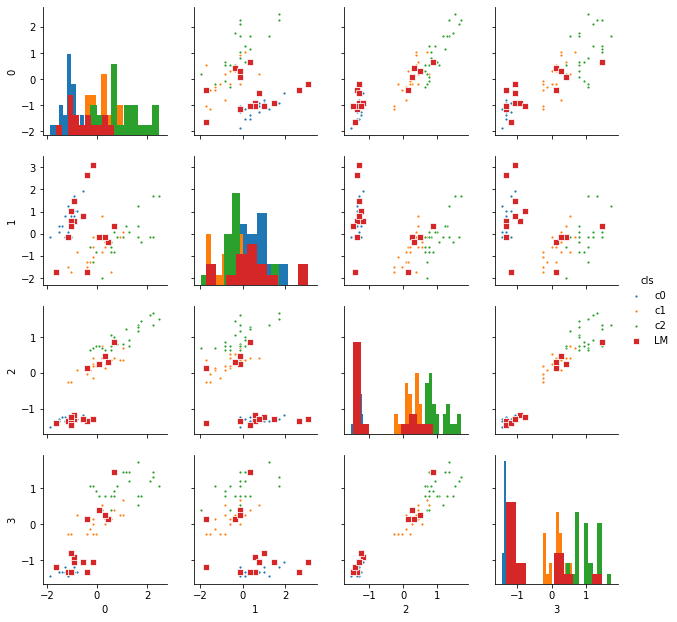

In [23]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', height=2.2, diag_kind='hist')

In [24]:
clf.predict_proba(xtest)[:5]

array([[9.9997675e-01, 2.3194112e-05, 1.1103430e-19],
       [9.9995339e-01, 4.6585239e-05, 7.2288662e-18],
       [9.9998450e-01, 1.5475945e-05, 9.0628764e-20],
       [9.9997532e-01, 2.4722342e-05, 1.4608595e-18],
       [9.9964571e-01, 3.5426253e-04, 3.2607157e-14]], dtype=float32)

In [25]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [26]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


In [27]:
pred_test = clf.predict(xtest)

In [28]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9063294526963737
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.91      0.80      0.85        25
           2       0.82      0.92      0.87        25

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75

[[25  0  0]
 [ 0 20  5]
 [ 0  2 23]]


## set landmarks on input x randomly (num_lm = 25)

In [29]:
num_lm = 25
clf = RBFClassifier(
    num_lm=num_lm,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), num_lm)]
)

In [30]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=50, verbose=0)

CPU times: user 2.44 s, sys: 47.4 ms, total: 2.49 s
Wall time: 2.28 s


In [31]:
clf.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 25)                1         
_________________________________________________________________
model_out (Model)            (None, 3)                 78        
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


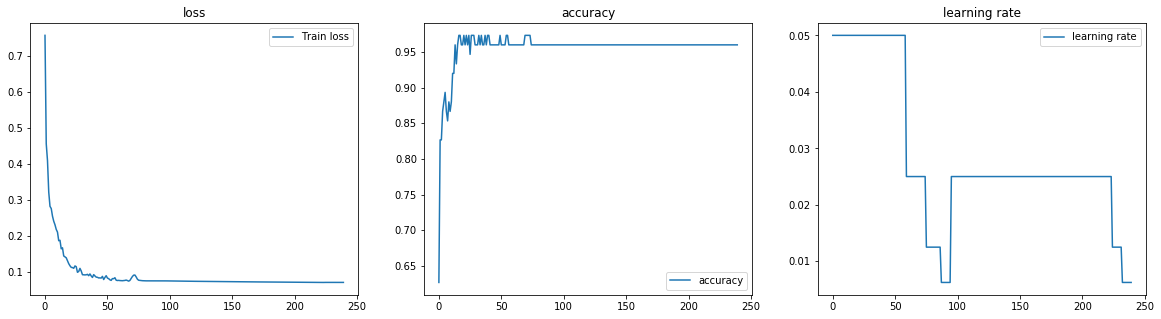

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [33]:
'''
trained gamma
'''
clf.current_gamma()

0.2958778

In [34]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[ 6.7450130e-01,  9.8217063e-02,  9.9010772e-01,  7.9067039e-01],
       [-9.0068167e-01,  5.5861068e-01, -1.1697137e+00, -9.2054772e-01],
       [-5.2505974e-02, -8.2256967e-01,  1.9438398e-01, -2.6238689e-01],
       [ 1.6438442e+00, -1.3197948e-01,  1.1606200e+00,  5.2740616e-01],
       [-7.7951390e-01,  1.0190042e+00, -1.2833885e+00, -1.3154444e+00],
       [ 3.1099737e-01, -1.3197948e-01,  6.4908332e-01,  7.9067039e-01],
       [ 2.1285160e+00, -1.3197948e-01,  1.6153190e+00,  1.1855668e+00],
       [ 1.8982960e-01, -1.9735534e+00,  7.0592070e-01,  3.9577395e-01],
       [ 2.2496839e+00,  1.7095945e+00,  1.6721563e+00,  1.3171992e+00],
       [-2.9484212e-01, -5.9237313e-01,  6.4908332e-01,  1.0539347e+00],
       [-1.2641851e+00,  7.8880775e-01, -1.2265511e+00, -1.3154444e+00],
       [-1.7367435e-01, -1.3197948e-01,  2.5122133e-01,  8.7750290e-04],
       [ 6.7450130e-01,  9.8217063e-02,  9.9010772e-01,  7.9067039e-01],
       [-2.9484212e-01, -5.9237313e-01,  6.4908332e

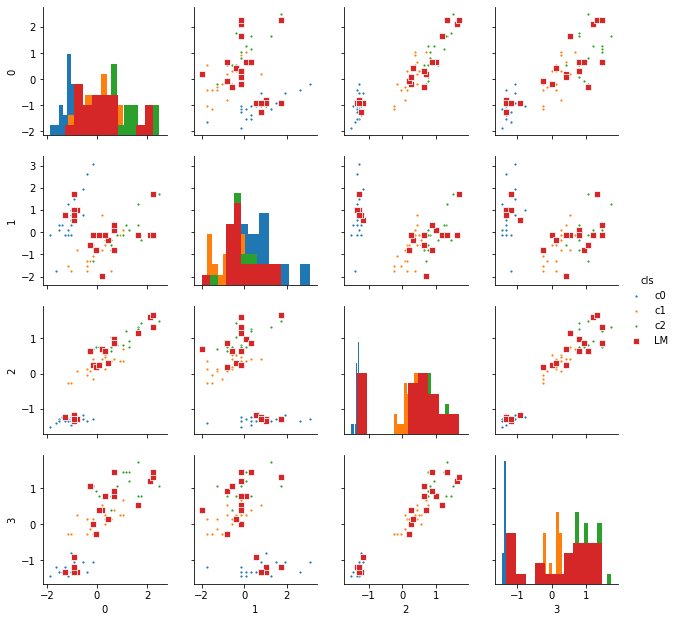

In [35]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', height=2.2, diag_kind='hist')

In [36]:
clf.predict_proba(xtest)[:5]

array([[9.9999964e-01, 3.1927476e-07, 2.5749541e-21],
       [9.9999726e-01, 2.7732647e-06, 2.3932711e-18],
       [9.9999976e-01, 2.4120797e-07, 5.7886220e-21],
       [9.9999928e-01, 7.2742188e-07, 1.2893474e-19],
       [9.9979633e-01, 2.0369988e-04, 5.9066632e-12]], dtype=float32)

In [37]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [38]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.92      0.94        25
           2       0.92      0.96      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]


In [39]:
pred_test = clf.predict(xtest)

In [40]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9732905982905983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

[[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


## set landmarks automatically on input x
* num_lm = 25

In [41]:
num_lm = 25
clf = RBFClassifier(
    num_lm=num_lm,
    lm_select_from_x=True,
    random_state=10001
)

In [42]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=50, verbose=0)

CPU times: user 2.85 s, sys: 42.4 ms, total: 2.89 s
Wall time: 2.63 s


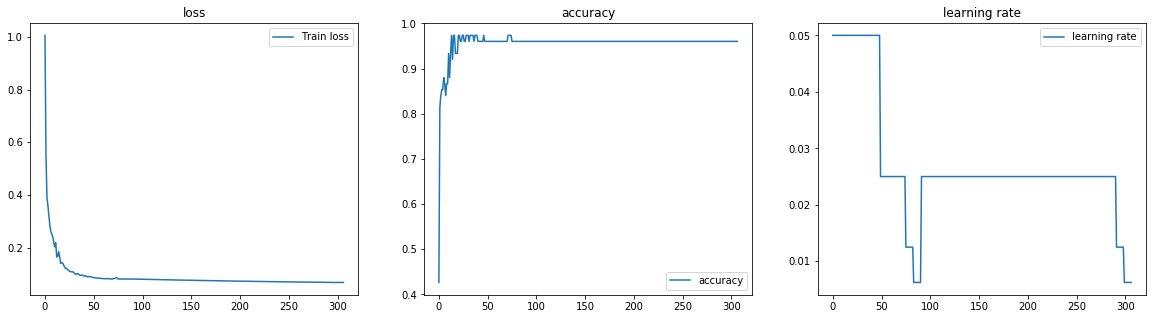

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [44]:
'''
trained gamma
'''
clf.current_gamma()

0.5283248

In [45]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[ 0.1898296 ,  0.78880775,  0.42173362,  0.52740616],
       [ 0.31099737, -0.13197948,  0.6490833 ,  0.7906704 ],
       [ 0.6745013 ,  0.32841417,  0.876433  ,  1.4488312 ],
       [-0.41600993,  2.630381  , -1.340226  , -1.3154444 ],
       [-0.17367435,  3.0907753 , -1.2833885 , -1.0521799 ],
       [ 0.1898296 , -1.9735534 ,  0.7059207 ,  0.39577395],
       [-1.5065212 ,  0.09821706, -1.2833885 , -1.3154444 ],
       [-0.41600993, -1.743357  ,  0.13754663,  0.13250954],
       [-1.1430173 , -0.13197948, -1.340226  , -1.3154444 ],
       [ 0.5533335 , -0.59237313,  0.762758  ,  0.39577395],
       [-0.29484212, -1.2829633 ,  0.08070928, -0.1307547 ],
       [-0.17367435, -1.2829633 ,  0.7059207 ,  1.0539347 ],
       [-1.0218495 ,  0.78880775, -1.2833885 , -1.3154444 ],
       [-0.17367435, -1.0527667 , -0.14664039, -0.2623869 ],
       [ 1.159173  ,  0.32841417,  1.2174573 ,  1.4488312 ],
       [-1.2641851 ,  0.78880775, -1.226551  , -1.3154444 ],
       [-0.41600993, -1.

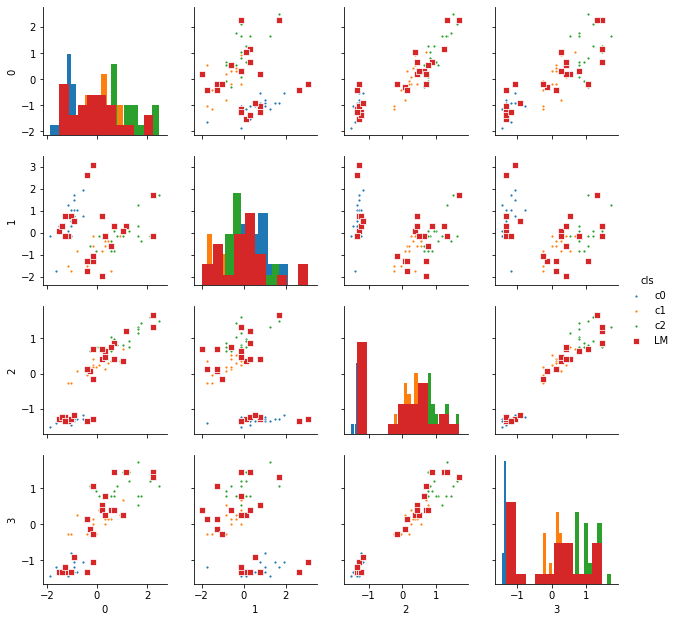

In [46]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', height=2.2, diag_kind='hist')

In [47]:
clf.predict_proba(xtest)[:5]

array([[9.9999511e-01, 4.9244200e-06, 5.0967899e-16],
       [9.9999952e-01, 4.4029628e-07, 2.9892700e-19],
       [9.9998951e-01, 1.0519476e-05, 1.4632089e-14],
       [9.9999845e-01, 1.5888492e-06, 2.3887057e-17],
       [9.9998963e-01, 1.0364559e-05, 2.4854542e-14]], dtype=float32)

In [48]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [49]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.92      0.94        25
           2       0.92      0.96      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]


In [50]:
pred_test = clf.predict(xtest)

In [51]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9465811965811964
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.88      0.92        25
           2       0.89      0.96      0.92        25

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

[[25  0  0]
 [ 0 22  3]
 [ 0  1 24]]


## set initial landmarks manually and train
* num_lm = 15
* train landmarks

In [52]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4-2,
    np.random.random((num_lm,))*4-2,
    np.random.random((num_lm,))*4-2,
    np.random.random((num_lm,))*4-2
]
# init_lm = np.c_[
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,)),
#     np.random.random((num_lm,))
# ]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma='scale',
    make_model_gkernel=make_model_gkernel3
)

In [53]:
init_lm

array([[ 0.38015216, -1.70248683,  1.93517397, -0.84066379],
       [ 0.76959301,  1.31877686, -1.44114399, -1.38483408],
       [-1.335684  ,  1.79736844,  1.53887785, -0.70904924],
       [ 1.83691412, -1.29618953, -0.90785516,  1.41926815],
       [ 0.35949905, -0.90137295, -1.05592982,  1.24865608],
       [-0.50504204, -1.19144177,  0.03689324,  1.00901474],
       [ 0.59194938,  0.43558296,  0.61929197,  1.87272244],
       [ 0.63282612, -0.7421397 , -1.10897282, -1.40513287],
       [ 1.12654745,  1.44453191, -0.04299493, -1.32309915],
       [-1.80861373,  1.74951163,  1.98441362,  1.57778887],
       [-1.68072482,  1.55512329, -0.6742645 ,  1.56292641],
       [ 1.40112116, -1.20672846, -1.7170956 ,  1.21437062],
       [-1.96224592, -0.17547144,  0.2869984 , -1.03960137],
       [ 1.60557741,  1.39415905, -1.39346429, -1.04492346],
       [ 0.15397355,  1.95270199,  1.12159145, -0.70315308]])

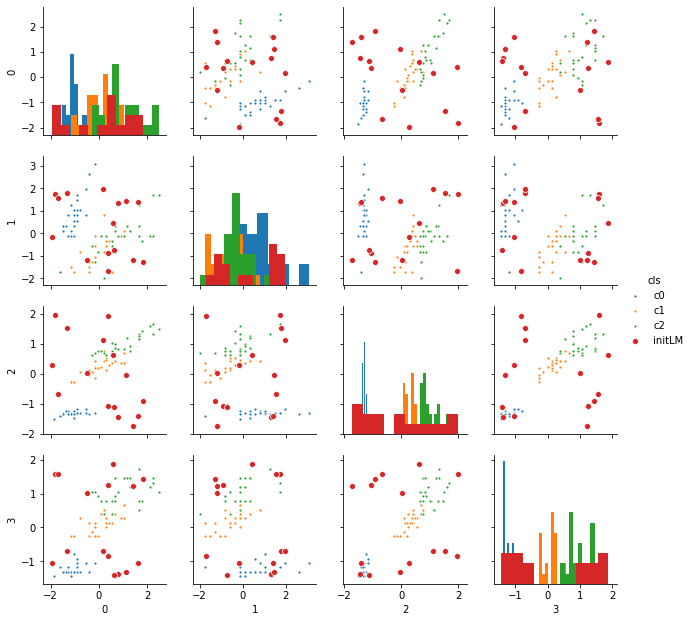

In [54]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', height=2.2, diag_kind='hist')

In [55]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=50, verbose=0)

CPU times: user 3.19 s, sys: 43.6 ms, total: 3.24 s
Wall time: 2.96 s


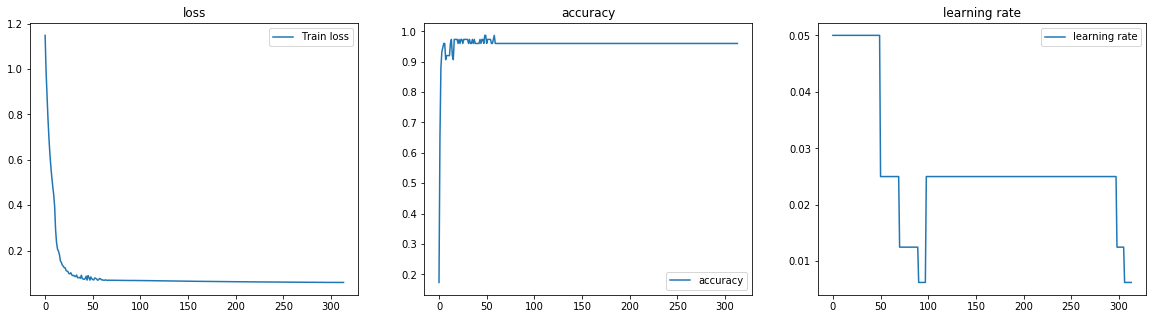

In [56]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [57]:
'''
trained gamma
'''
clf.current_gamma()

0.17131189

In [58]:
'''
trained landmarks
'''
lm = clf.current_lm()
lm

array([[-3.88012469e-01, -1.22836876e+00,  4.03657794e-01,
        -4.37510520e-01],
       [-4.92627881e-02,  3.33328433e-02, -1.22753680e+00,
        -1.10896337e+00],
       [-6.19126379e-01,  8.71396542e-01, -1.09314489e+00,
        -1.32842338e+00],
       [ 3.39290589e-01, -5.84242880e-01,  1.55110037e+00,
         1.66656148e+00],
       [ 7.89400280e-01, -5.53713918e-01, -7.50533283e-01,
        -1.63700089e-01],
       [ 4.60142866e-02, -9.72199023e-01,  1.40472555e+00,
         1.21961057e+00],
       [ 4.25368130e-01, -4.65911418e-01,  1.73335207e+00,
         1.65406311e+00],
       [ 5.53378999e-01, -2.65474707e-01, -7.88263679e-01,
        -9.33093607e-01],
       [ 7.05085337e-01,  3.17742586e-01, -7.69945085e-01,
        -1.04910207e+00],
       [ 1.14138462e-01, -3.15917969e-01,  1.59933293e+00,
         1.56181645e+00],
       [-1.21516848e+00,  4.63364184e-01, -1.94134128e+00,
        -1.32571936e+00],
       [ 7.75119543e-01, -6.26896560e-01, -5.80195129e-01,
      

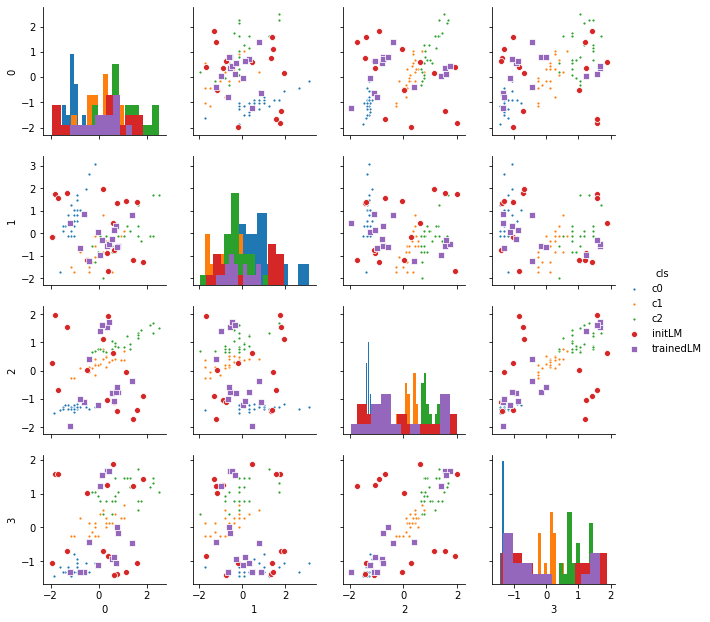

In [59]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', height=2.2, diag_kind='hist')

In [60]:
clf.predict_proba(xtest)[:5]

array([[9.9996138e-01, 3.8612063e-05, 5.0880061e-11],
       [9.9996305e-01, 3.6951802e-05, 1.1770031e-10],
       [9.9996102e-01, 3.8996841e-05, 3.5623141e-10],
       [9.9996459e-01, 3.5436049e-05, 7.5224538e-10],
       [9.9974412e-01, 2.5592247e-04, 1.1509264e-08]], dtype=float32)

In [61]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [62]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.92      0.94        25
           2       0.92      0.96      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]


In [63]:
pred_test = clf.predict(xtest)

In [64]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9866613311991462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.96      0.98        25
           2       0.96      1.00      0.98        25

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

[[25  0  0]
 [ 0 24  1]
 [ 0  0 25]]


## select landmarks and gamma with Gaussian Mixture Model

In [65]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

In [66]:
num_lm = 25
gmm = GaussianMixture(n_components=num_lm, covariance_type='tied')
gmm.fit(xtrain)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=25, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [67]:
init_lm = gmm.means_
init_lm

array([[-0.82188892,  0.79181917, -1.22809233, -0.92459187],
       [ 1.03312237, -0.13193835,  0.70820161,  0.66653404],
       [-0.77929283, -0.82280501,  0.08074473,  0.2640656 ],
       [-1.56825473,  0.14980114, -1.3435624 , -1.34905691],
       [ 2.37085187,  1.70959449,  1.58690035,  1.18556696],
       [-0.04810069, -0.16280627,  0.250771  ,  0.20522866],
       [ 2.18909905, -0.13198001,  1.47322517,  1.31719804],
       [-0.7794957 ,  1.70953809, -1.24549827, -1.09627167],
       [ 0.33307379, -0.40679501,  0.40164392,  0.15969237],
       [-0.34316815, -1.37480813,  0.03532236, -0.07820588],
       [-0.173671  , -0.89927747,  0.70591811,  1.01005206],
       [-1.627689  , -1.74335694, -1.39706337, -1.18381214],
       [ 0.37158156, -1.85845518,  0.53540848,  0.26414175],
       [-0.29484229,  2.86057757, -1.31180717, -1.18381203],
       [ 0.49307557, -0.76101731,  0.76544341,  0.66073684],
       [ 0.4591179 , -0.1305961 ,  0.85435439,  0.82958023],
       [ 1.07045124,  0.

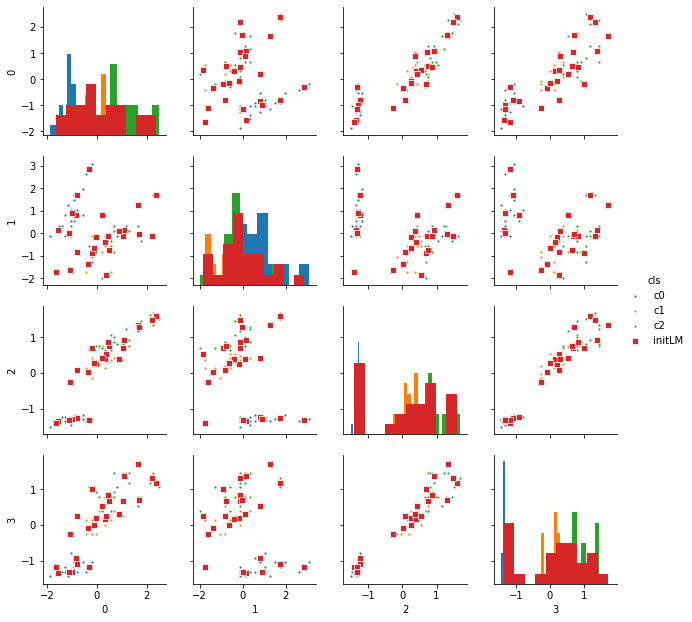

In [68]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s'], hue='cls', height=2.2, diag_kind='hist')

In [69]:
gmm.covariances_

array([[0.02198045, 0.00351265, 0.00103648, 0.00033471],
       [0.00351265, 0.03281088, 0.00028293, 0.00118387],
       [0.00103648, 0.00028293, 0.00988499, 0.00324107],
       [0.00033471, 0.00118387, 0.00324107, 0.01373756]])

In [70]:
init_gamma = 1 / (2*np.diag(gmm.covariances_).mean()*num_lm/3)
init_gamma

3.0606828485347872

In [71]:
clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma=init_gamma,
    make_model_gkernel=make_model_gkernel3
)

In [72]:
%%time
hst = clf.fit(xtrain, ytrain, epochs=50, verbose=0)

CPU times: user 3.71 s, sys: 49.8 ms, total: 3.76 s
Wall time: 3.38 s


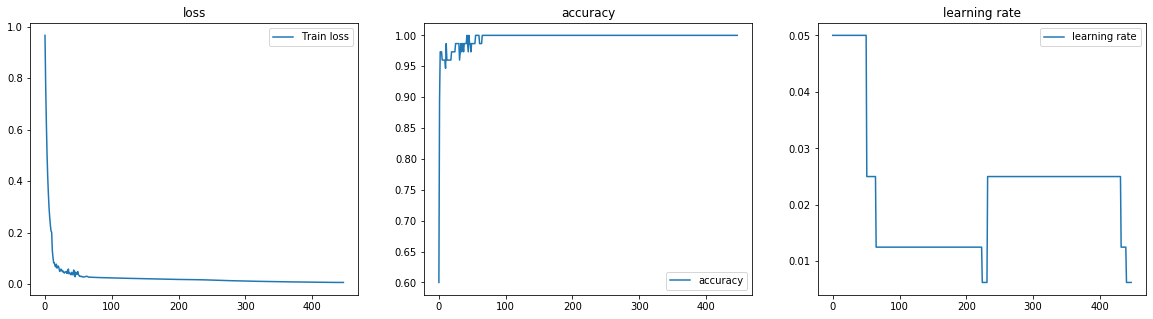

In [73]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [74]:
1 / (4*xtrain.var()), 1/(2*np.sqrt(4/6)*2)

(0.2510118142948827, 0.30618621784789724)

In [75]:
clf.current_gamma()

1.883314

In [76]:
1 / clf.current_gamma() / 2

0.26548944914172545

In [77]:
'''
landmarks
'''
lm = clf.current_lm()
lm

array([[-0.8468142 ,  1.108158  , -1.2569844 , -1.1236339 ],
       [ 1.1842096 ,  0.07734822,  0.4928482 ,  0.63187325],
       [-0.01837482, -1.057056  ,  0.36262998,  0.1425269 ],
       [-1.5143154 , -0.01677125, -1.4028069 , -1.360365  ],
       [ 2.1069381 ,  1.5127549 ,  1.4517512 ,  1.3605202 ],
       [-0.15153484, -0.825867  ,  0.4102233 ,  0.16562939],
       [ 1.8858685 ,  0.01546783,  1.4921178 ,  0.9773404 ],
       [-0.42939728,  2.410688  , -1.2453672 , -1.1072599 ],
       [-0.13373844, -0.8868173 ,  0.42908582,  0.16317469],
       [ 0.1849324 , -1.2962056 ,  0.27021173,  0.08607362],
       [-0.07629359, -1.8161064 ,  0.76000416,  0.8696949 ],
       [-1.6287274 , -1.738473  , -1.3992409 , -1.1862154 ],
       [ 0.01102418, -2.0059786 ,  0.8024454 ,  0.638452  ],
       [-0.24995393,  2.900292  , -1.2806871 , -1.0906982 ],
       [ 0.67772084, -0.60259837,  0.9536074 ,  0.36497352],
       [ 0.46109343, -0.4404332 ,  0.9803465 ,  0.80773735],
       [ 0.22053295, -0.

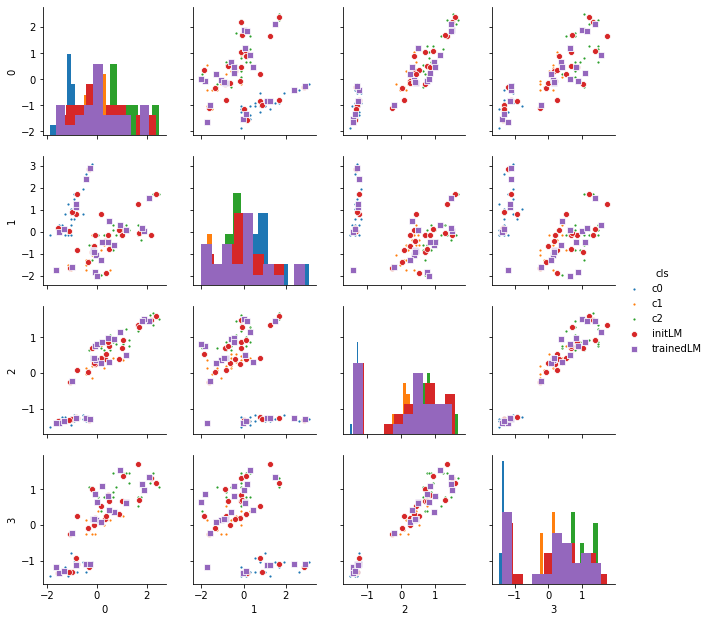

In [78]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', height=2.2, diag_kind='hist')

In [79]:
clf.predict_proba(xtest)[:5]

array([[9.99949813e-01, 2.13575913e-05, 2.88761858e-05],
       [9.99966145e-01, 1.30256385e-05, 2.08359033e-05],
       [9.99898553e-01, 4.13915295e-05, 6.00392086e-05],
       [9.98319447e-01, 5.14698855e-04, 1.16577814e-03],
       [9.97247159e-01, 7.85016688e-04, 1.96782290e-03]], dtype=float32)

In [80]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [81]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

[[25  0  0]
 [ 0 25  0]
 [ 0  0 25]]


In [82]:
pred_test = clf.predict(xtest)

In [83]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      0.96      0.94        25
           2       0.96      0.92      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 24  1]
 [ 0  2 23]]


## set initial landmarks manually and not train gaussian layer
* num_lm = 15

In [84]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4-2,
    np.random.random((num_lm,))*4-2,
    np.random.random((num_lm,))*4-2,
    np.random.random((num_lm,))*4-2
]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma='scale',
    make_model_gkernel=make_model_gkernel1
)

In [85]:
init_lm

array([[ 0.40179651,  1.46685401, -0.01161636,  0.24883731],
       [-1.89577744, -1.16524687,  1.43389709,  1.92739299],
       [-1.77198119, -0.92388063, -0.31765174,  1.90530379],
       [-1.16829586,  0.17764305,  1.05337617,  1.65565334],
       [ 1.7711244 , -1.91402006,  1.29720701, -1.7620834 ],
       [-0.54996509,  0.352847  ,  1.12129246,  1.01754325],
       [-0.87900594, -0.41110973, -1.17391032,  0.85050823],
       [-0.74316878,  0.89001462,  0.61357895, -1.02465087],
       [-1.66719966, -0.99471101, -1.15051614,  0.08838269],
       [-0.86321709,  0.14643143, -1.53622504,  0.43628744],
       [-0.57822772, -1.35533317,  1.09631073,  0.09163983],
       [-1.22658649,  0.94656278, -1.10243677, -1.100933  ],
       [-1.49364046,  1.85704385,  0.47753816, -0.15548797],
       [ 0.80627385,  1.32440295, -1.77106326, -0.13657648],
       [ 1.34840339, -0.12185366,  0.45268315,  0.54429501]])

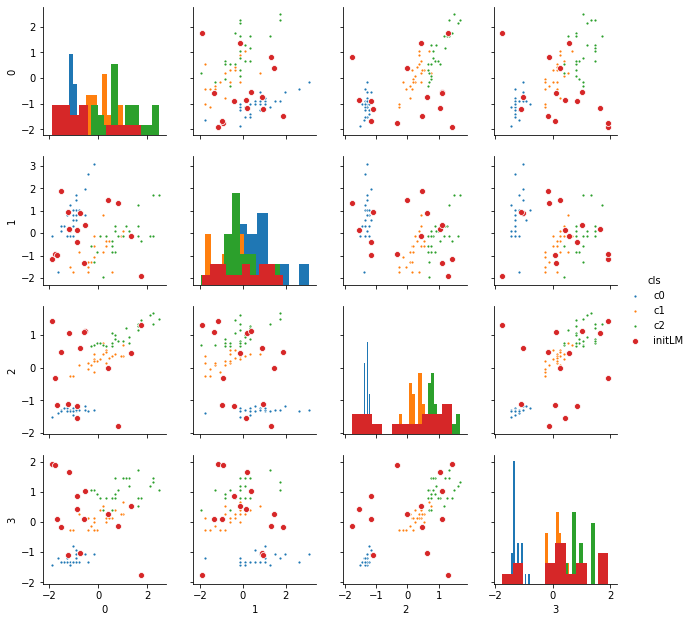

In [86]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', height=2.2, diag_kind='hist')

In [87]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=50, verbose=0)

CPU times: user 2.91 s, sys: 57.1 ms, total: 2.97 s
Wall time: 2.68 s


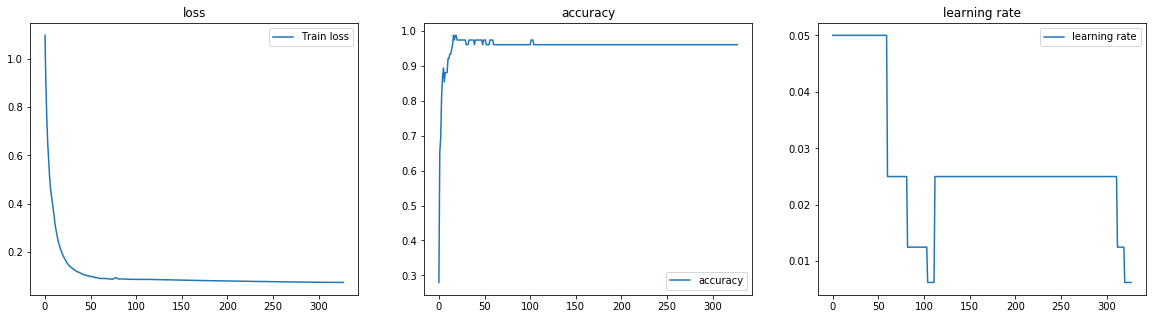

In [88]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [89]:
1 / (4*xtrain.var()), 1/(2*np.sqrt(4/6)*2)

(0.2510118142948827, 0.30618621784789724)

In [90]:
'''
fixed gamma
'''
clf.current_gamma()

0.2510118

In [91]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[ 0.40179652,  1.466854  , -0.01161636,  0.2488373 ],
       [-1.8957775 , -1.1652468 ,  1.4338971 ,  1.927393  ],
       [-1.7719812 , -0.92388064, -0.31765175,  1.9053038 ],
       [-1.1682959 ,  0.17764305,  1.0533762 ,  1.6556534 ],
       [ 1.7711244 , -1.9140201 ,  1.297207  , -1.7620834 ],
       [-0.5499651 ,  0.352847  ,  1.1212925 ,  1.0175432 ],
       [-0.87900597, -0.41110972, -1.1739104 ,  0.8505082 ],
       [-0.7431688 ,  0.89001465,  0.613579  , -1.0246508 ],
       [-1.6671996 , -0.994711  , -1.1505162 ,  0.08838269],
       [-0.8632171 ,  0.14643143, -1.5362251 ,  0.43628743],
       [-0.5782277 , -1.3553332 ,  1.0963107 ,  0.09163983],
       [-1.2265865 ,  0.94656277, -1.1024368 , -1.100933  ],
       [-1.4936404 ,  1.8570439 ,  0.47753817, -0.15548797],
       [ 0.8062738 ,  1.3244029 , -1.7710632 , -0.13657649],
       [ 1.3484033 , -0.12185366,  0.45268315,  0.544295  ]],
      dtype=float32)

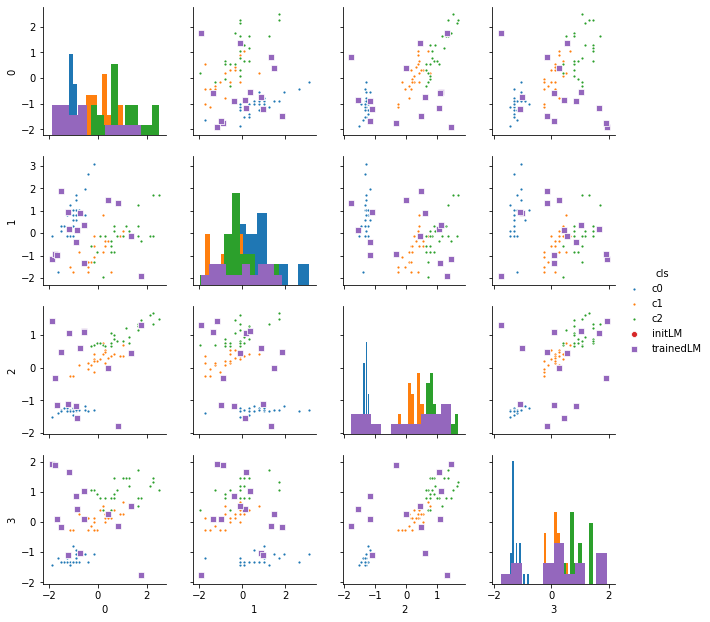

In [92]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', height=2.2, diag_kind='hist')

In [93]:
clf.predict_proba(xtest)[:5]

array([[9.99849677e-01, 1.50291991e-04, 2.33193043e-09],
       [9.99712288e-01, 2.87726201e-04, 7.21397653e-09],
       [9.99889374e-01, 1.10615394e-04, 5.23062482e-09],
       [9.99893308e-01, 1.06656640e-04, 2.67538169e-09],
       [9.97249544e-01, 2.74989754e-03, 5.66162271e-07]], dtype=float32)

In [94]:
clf.predict_proba(xtest).sum(axis=1)

array([0.99999994, 1.        , 1.        , 0.99999994, 1.        ,
       1.        , 0.99999994, 1.0000001 , 0.99999994, 1.        ,
       1.        , 1.        , 0.99999994, 1.        , 1.        ,
       0.99999994, 0.99999994, 1.        , 1.        , 1.        ,
       0.99999994, 1.        , 0.99999994, 1.        , 0.99999994,
       1.        , 1.        , 1.        , 0.9999999 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999994, 1.        , 1.        ,
       0.99999994, 1.        , 1.        , 1.0000001 , 0.99999994,
       1.        , 0.99999994, 1.        , 1.0000001 , 1.0000001 ,
       0.99999994, 0.99999994, 0.99999994, 1.        , 1.        ,
       0.99999994, 1.0000001 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99999994, 1.        , 0.99999994, 1.        ,
       1.        , 0.99999994, 0.99999994, 1.        , 1.00000

In [95]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [96]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.92      0.94        25
           2       0.92      0.96      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]


In [97]:
pred_test = clf.predict(xtest)

In [98]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9866613311991462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.96      0.98        25
           2       0.96      1.00      0.98        25

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

[[25  0  0]
 [ 0 24  1]
 [ 0  0 25]]


## vector input

In [99]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4-2,
    np.random.random((num_lm,))*4-2,
    np.random.random((num_lm,))*4-2,
    np.random.random((num_lm,))*4-2
]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma='scale',
    make_model_gkernel=make_model_gkernel1
)

In [100]:
init_lm

array([[ 1.68825072,  0.87883255,  0.93134898,  0.82176767],
       [-1.87023202,  1.07197287, -0.37822226,  1.09178272],
       [-0.74265612,  1.92093073,  1.46057044, -1.49894946],
       [-1.29677641,  0.82764465,  0.11593741, -1.64640493],
       [-1.29001354, -0.60118317,  1.98103845, -0.40884333],
       [-0.21185138,  0.52288811, -0.88887584, -1.88195215],
       [ 1.84413309,  1.40980873,  1.59923919,  1.355572  ],
       [-0.41184217,  1.79705663, -1.29262009, -0.86747147],
       [ 0.87694328, -1.84925588,  0.14109696, -0.72552697],
       [ 0.27032599,  0.04745999, -0.36756897, -1.95517144],
       [ 0.72797979, -1.61761034,  0.98536126,  0.7142963 ],
       [ 1.27014992, -0.74249606,  0.24792305, -1.35311884],
       [-0.84769408, -0.33649533,  1.64766316,  1.09718929],
       [ 0.95233512, -0.60724874, -0.71959621, -1.81205089],
       [-0.31466899,  0.83536022, -1.91585701, -0.39945905]])

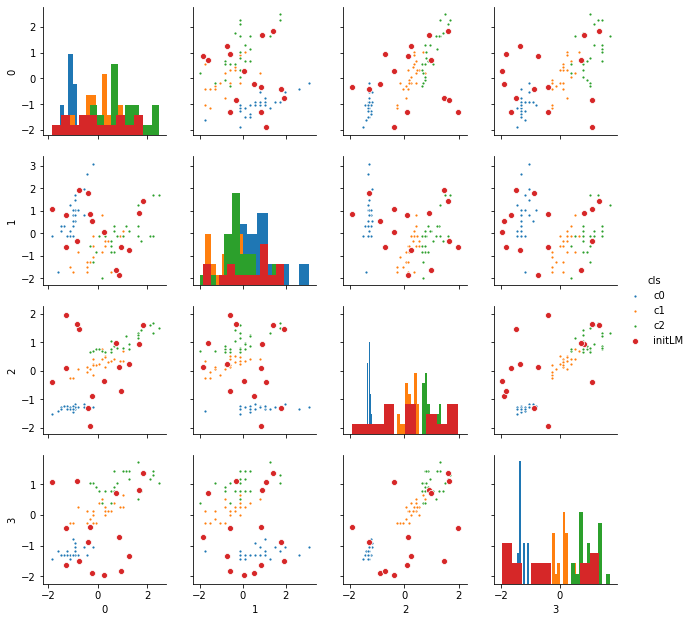

In [101]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', height=2.2, diag_kind='hist')

In [102]:
ytrain[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [103]:
np.argmax(ytrain, axis=1)[:5]

array([0, 0, 0, 0, 0])

In [104]:
%%time
#hst = clf.fit(xtrain, np.argmax(ytrain, axis=1), epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, np.argmax(ytrain, axis=1), epochs=50, verbose=0)

CPU times: user 2.66 s, sys: 50.7 ms, total: 2.71 s
Wall time: 2.45 s


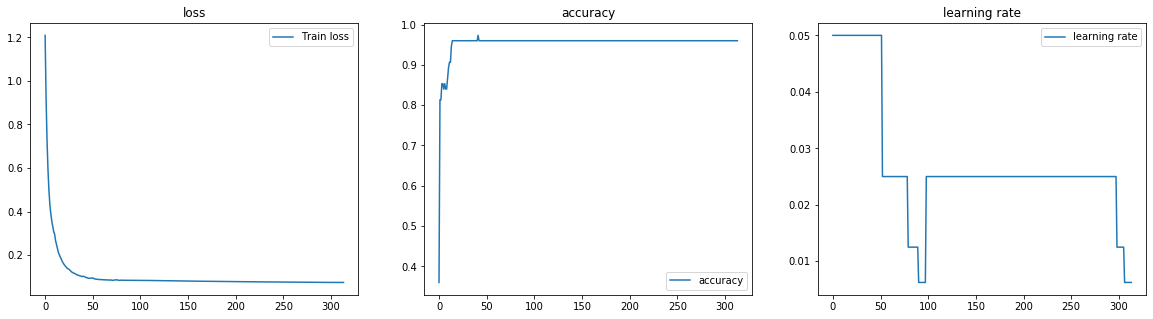

In [105]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [106]:
1 / (4*xtrain.var()), 1/(2*np.sqrt(4/6)*2)

(0.2510118142948827, 0.30618621784789724)

In [107]:
'''
fixed gamma
'''
clf.current_gamma()

0.2510118

In [108]:
'''
fixed landmarks
'''
lm = clf.current_lm()
lm

array([[ 1.6882508 ,  0.8788325 ,  0.931349  ,  0.8217677 ],
       [-1.870232  ,  1.0719728 , -0.37822226,  1.0917827 ],
       [-0.7426561 ,  1.9209307 ,  1.4605705 , -1.4989494 ],
       [-1.2967764 ,  0.82764465,  0.1159374 , -1.646405  ],
       [-1.2900136 , -0.6011832 ,  1.9810385 , -0.40884334],
       [-0.21185139,  0.5228881 , -0.88887584, -1.8819522 ],
       [ 1.8441331 ,  1.4098088 ,  1.5992392 ,  1.355572  ],
       [-0.41184217,  1.7970567 , -1.2926201 , -0.86747146],
       [ 0.8769433 , -1.8492559 ,  0.14109696, -0.725527  ],
       [ 0.270326  ,  0.04745999, -0.36756897, -1.9551715 ],
       [ 0.7279798 , -1.6176103 ,  0.9853613 ,  0.7142963 ],
       [ 1.27015   , -0.7424961 ,  0.24792305, -1.3531189 ],
       [-0.8476941 , -0.33649534,  1.6476631 ,  1.0971893 ],
       [ 0.9523351 , -0.6072487 , -0.7195962 , -1.8120509 ],
       [-0.31466898,  0.8353602 , -1.915857  , -0.39945903]],
      dtype=float32)

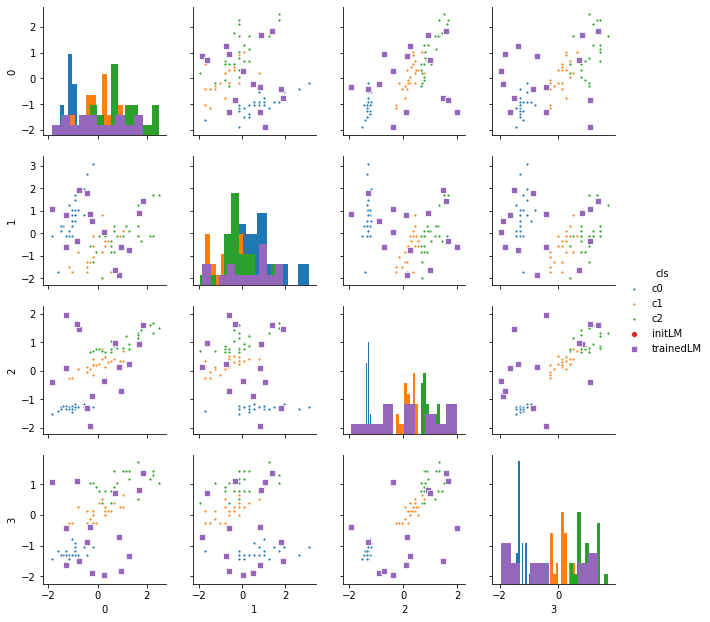

In [109]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', height=2.2, diag_kind='hist')

In [110]:
clf.predict_proba(xtest)[:5]

array([[9.9990726e-01, 9.2739479e-05, 1.2173288e-13],
       [9.9935812e-01, 6.4183801e-04, 7.0065058e-11],
       [9.9990809e-01, 9.1915150e-05, 7.3360908e-13],
       [9.9962842e-01, 3.7153609e-04, 6.7311393e-11],
       [9.9329293e-01, 6.7067863e-03, 3.3543859e-07]], dtype=float32)

In [111]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [112]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.92      0.94        25
           2       0.92      0.96      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]


In [113]:
pred_test = clf.predict(xtest)

In [114]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9866613311991462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.96      0.98        25
           2       0.96      1.00      0.98        25

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

[[25  0  0]
 [ 0 24  1]
 [ 0  0 25]]


## sigmoid + binary_crossentropy

In [115]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4-2,
    np.random.random((num_lm,))*4-2,
    np.random.random((num_lm,))*4-2,
    np.random.random((num_lm,))*4-2
]

clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    gamma='scale',
    activation='sigmoid', loss='binary_crossentropy',
    make_model_gkernel=make_model_gkernel3
)

In [116]:
init_lm

array([[-1.45128867, -1.08035493, -0.50139346,  0.36050296],
       [-0.17054604,  0.31505762,  1.02884723,  0.65427799],
       [-1.31454416, -1.6691153 ,  0.04108652,  0.08331556],
       [ 1.54528489, -0.86383035,  1.06468183,  0.50280285],
       [-0.1032098 , -0.4587473 , -0.16541033, -1.99590412],
       [-1.87795355, -1.13515567,  0.1195439 ,  0.92570444],
       [ 0.61987649, -0.140025  , -1.30877519, -1.54127947],
       [-1.76304134,  1.55968488, -0.28542739, -1.23430468],
       [ 1.6620302 , -1.29529713,  1.51998122, -1.1252334 ],
       [ 1.04406099,  0.17114867,  0.97861375, -0.08287907],
       [-0.92629234,  0.22155934, -0.12663808, -0.15454012],
       [-0.38106433, -1.1774266 ,  0.04135228,  0.28624554],
       [ 1.66678506,  1.0238376 , -1.33205026, -0.74351206],
       [-0.48078022, -0.19600784,  0.63426304, -0.91079977],
       [ 1.57783012, -1.12160461, -1.29298481, -1.04758091]])

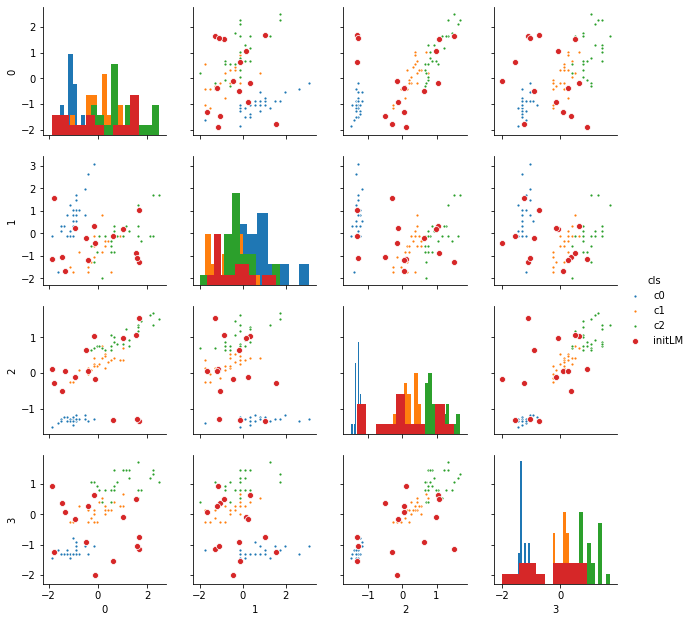

In [117]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o'], hue='cls', height=2.2, diag_kind='hist')

In [118]:
%%time
#hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=256, verbose=0)
hst = clf.fit(xtrain, ytrain, epochs=50, verbose=0)

CPU times: user 3.46 s, sys: 49 ms, total: 3.51 s
Wall time: 3.23 s


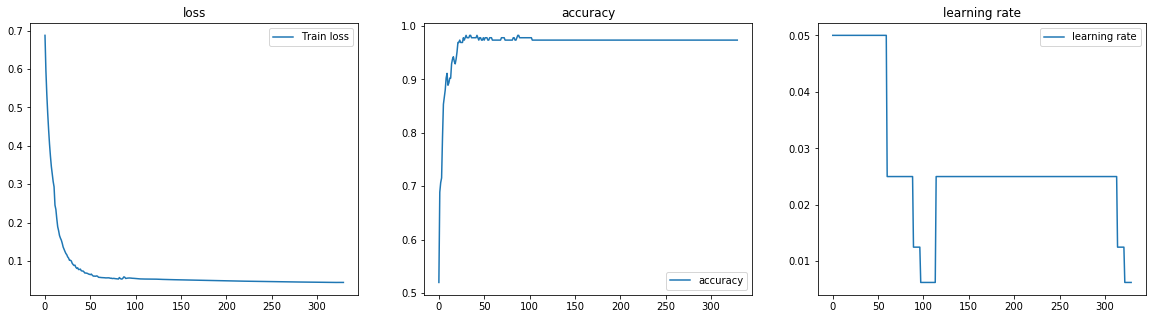

In [119]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [120]:
'''
gamma
'''
clf.current_gamma()

0.33075547

In [121]:
lm = clf.current_lm()
lm

array([[-0.3500687 , -1.0522919 , -0.34118798, -0.4734261 ],
       [ 0.3415949 , -0.67164564,  1.3595741 ,  1.3974339 ],
       [-0.421762  , -1.1139778 , -0.2886881 , -0.44560334],
       [ 0.33564213, -0.656949  ,  1.366662  ,  1.4164073 ],
       [-1.3902034 , -1.1277611 , -1.4442362 , -1.272428  ],
       [-0.832682  , -1.3715858 , -0.11178688, -0.23429607],
       [-0.90001726,  1.2853081 , -1.518227  , -1.3645556 ],
       [-1.3383143 ,  0.08249252, -1.6972585 , -1.516388  ],
       [ 0.3605846 , -0.49545583,  1.3752395 ,  1.3964068 ],
       [ 2.0138028 ,  1.0260609 ,  1.7987958 ,  1.3411167 ],
       [-0.3103641 ,  2.6772516 , -1.2964865 , -1.1189812 ],
       [ 0.6694881 ,  0.03506663, -0.2860422 , -0.28835595],
       [ 0.8979869 ,  0.28535947, -0.37755144, -0.24159214],
       [ 0.792361  ,  0.04508834, -0.315335  , -0.3156429 ],
       [ 0.8248238 ,  0.08532188, -0.334809  , -0.27948457]],
      dtype=float32)

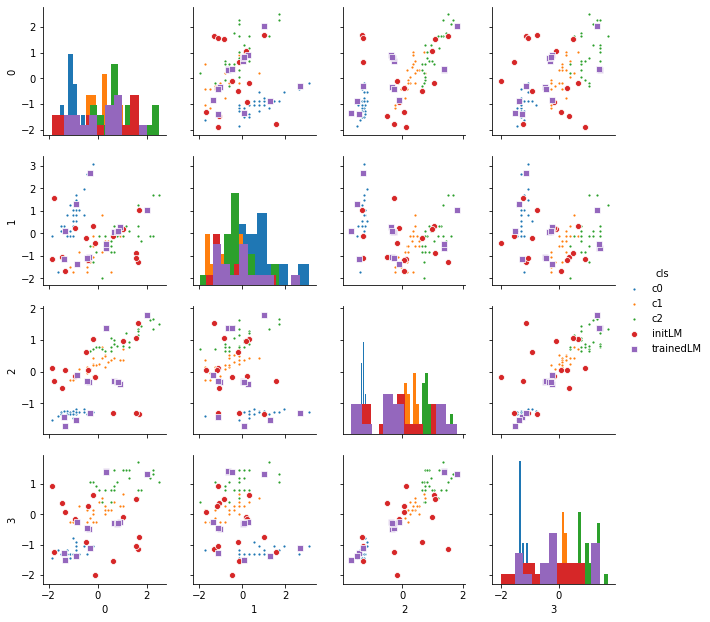

In [122]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = ['c'+str(ee) for ee in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['o','s'], hue='cls', height=2.2, diag_kind='hist')

In [123]:
clf.predict_proba(xtrain)[:5]

array([[9.98750091e-01, 1.91655755e-03, 4.77433205e-05],
       [9.99241412e-01, 4.54992056e-04, 1.67995691e-04],
       [9.98839438e-01, 1.80056691e-03, 1.25199556e-03],
       [9.99498844e-01, 3.00467014e-04, 1.21712685e-04],
       [9.99189496e-01, 7.59959221e-04, 6.78002834e-05]], dtype=float32)

In [124]:
clf.predict_proba(xtrain).sum(axis=1)

array([1.0007143 , 0.99986434, 1.0018921 , 0.999921  , 1.0000173 ,
       0.9999295 , 1.0002868 , 1.0371836 , 1.0000039 , 1.0008017 ,
       1.0003663 , 1.0022507 , 1.0028208 , 1.0000389 , 0.9998212 ,
       1.0037258 , 1.0103936 , 0.9999471 , 1.0003214 , 0.99994963,
       1.0257252 , 0.99993825, 1.0006521 , 0.99990463, 0.9999113 ,
       0.9917192 , 1.0017524 , 1.0004823 , 0.98466223, 0.9903836 ,
       0.9969747 , 1.0030617 , 0.99777305, 0.99998295, 0.99992156,
       1.0000315 , 1.0011533 , 0.998789  , 0.9876965 , 1.0001621 ,
       0.99936867, 1.0772426 , 0.89202785, 0.98741937, 1.0009294 ,
       0.998333  , 0.9832188 , 0.99880546, 0.9999278 , 0.99959993,
       1.0059128 , 1.0022571 , 0.99896884, 0.9963263 , 1.0009952 ,
       1.0007114 , 1.0001723 , 0.99893785, 1.0045254 , 0.9543493 ,
       1.0003446 , 1.019684  , 0.99978167, 1.0086795 , 0.9762888 ,
       1.0046958 , 1.0561409 , 0.9979428 , 1.0009263 , 0.99961793,
       0.99798656, 1.0001453 , 0.99944913, 1.00073   , 1.00052

In [125]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [126]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.92      0.94        25
           2       0.92      0.96      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]


In [127]:
pred_test = clf.predict(xtest)

In [128]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.92      0.94        25
           2       0.92      0.96      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]


## Regressor

In [129]:
est = RBFRegressor(
    num_lm=30,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), 30)],
    make_model_gkernel=make_model_gkernel3
)
# est = RBFRegressor(
#     num_lm=10,
#     lm=xtrain[:10],
#     make_model_gkernel=make_model_gkernel3,
#     loss='mae'
# )

In [130]:
%%time
#hst = est.fit(xtrain, np.argmax(ytrain, axis=1), epochs=500, batch_size=256, verbose=0)
hst = est.fit(xtrain, np.argmax(ytrain, axis=1), epochs=50, verbose=0)

CPU times: user 2.25 s, sys: 34.2 ms, total: 2.29 s
Wall time: 2.14 s


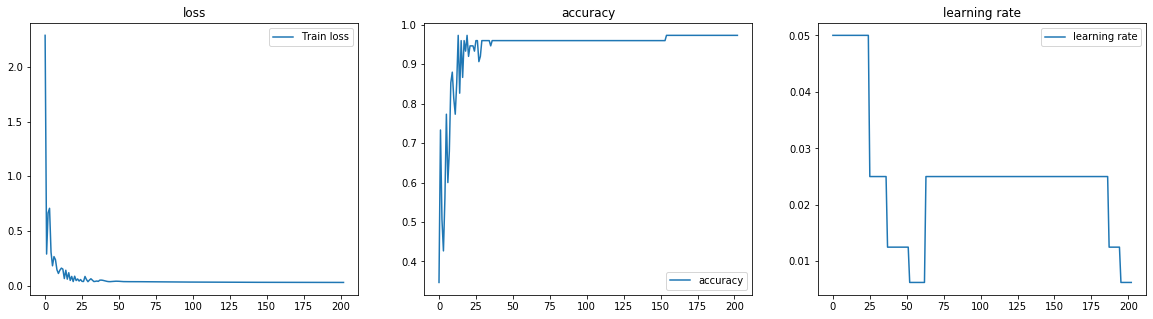

In [131]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [132]:
est.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 30)                121       
_________________________________________________________________
model_out (Model)            (None, 1)                 31        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [133]:
est.predict(xtrain)

array([-3.1589568e-03, -4.1520000e-03, -1.7177939e-02,  8.1539154e-05,
       -7.0182085e-03,  1.4505923e-02, -3.7406534e-02,  4.3328404e-02,
       -5.6506693e-03, -1.2623787e-02, -7.9837441e-04,  4.5871943e-02,
        1.7949939e-02, -6.5464377e-03,  7.5599849e-03,  6.6215694e-03,
       -2.1478653e-02, -1.8343896e-02, -5.5497289e-03, -1.4389157e-03,
        1.5983474e-01,  5.1454425e-02,  4.6973526e-03, -7.5846314e-03,
       -6.9046319e-03,  1.0351211e+00,  1.2761555e+00,  1.1933386e+00,
        8.0409837e-01,  1.1317923e+00,  1.0795202e+00,  1.2485895e+00,
        9.3199825e-01,  8.3626413e-01,  1.0296652e+00,  9.2244971e-01,
        1.0926890e+00,  9.7454584e-01,  1.5840671e+00,  7.5437486e-01,
        9.5610023e-01,  1.7511733e+00,  9.3959129e-01,  1.1716268e+00,
        1.2293270e+00,  1.1305236e+00,  8.5368353e-01,  8.2615811e-01,
        9.5119476e-01,  1.0481319e+00,  1.9937363e+00,  2.0187395e+00,
        2.0586588e+00,  1.9692307e+00,  1.9608521e+00,  1.9960625e+00,
      

In [134]:
est.__dict__

{'build_fn': <function keras_ex.gkernel.sklearn.make_model(make_model_gkernel=<function make_model_gkernel2 at 0x7f48c2b8e488>, make_model_out=<function make_model_out at 0x7f48c2b8e598>, reg_l1=0.0, reg_l2=0.0, nn=2, num_lm=2, lm=None, gamma=None, random_state=None, num_cls=2, activation='softmax', opt=0.02, lr=0.05, loss='categorical_crossentropy', session_clear=True, batch_size_middle=32, lm_select_from_x=None, tol=None, epochs_warmup=10)>,
 'sk_params': {'num_lm': 30,
  'lm': array([[-0.9006817 ,  1.0190042 , -1.340226  , -1.1838121 ],
         [-1.1430173 ,  1.2492008 , -1.340226  , -1.4470763 ],
         [ 0.1898296 , -0.82256967,  0.762758  ,  0.52740616],
         [-0.9006817 ,  1.7095945 , -1.2833885 , -1.1838121 ],
         [-0.05250597, -0.82256967,  0.19438398, -0.2623869 ],
         [-1.0218495 ,  0.32841417, -1.4539007 , -1.3154444 ],
         [ 0.9168369 , -0.13197948,  0.36489627,  0.26414174],
         [ 0.43216518, -0.362176  ,  0.30805892,  0.13250954],
         [ 0.

In [135]:
est.score(xtrain, np.argmax(ytrain, axis=1))

75/75 [==============================] - 0s 2ms/step


-0.030026336312294007

In [136]:
est.score(xtest, np.argmax(yans, axis=1))

75/75 [==============================] - 0s 81us/step


-0.03488476783037186

## AdaBoostClassifier
confirm if it can be used with adaboost

In [137]:
from sklearn.ensemble import AdaBoostClassifier

In [138]:
clf = AdaBoostClassifier(
    RBFClassifier(
        num_lm=30,
        lm_select_from_x=True,
        random_state=None,
        lr=0.05, gamma='scale',
        epochs=50, verbose=0,
        session_clear=False
    ),
    n_estimators=5
)

In [139]:
clf.fit(xtrain, np.argmax(ytrain, axis=1))

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=<keras_ex.gkernel.sklearn.RBFClassifier object at 0x7f486c2949e8>,
                   learning_rate=1.0, n_estimators=5, random_state=None)

In [140]:
pred = clf.predict(xtrain)
pred[:5]

array([0, 0, 0, 0, 0])

In [141]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.92      0.94        25
           2       0.92      0.96      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]


In [142]:
pred_test = clf.predict(xtest)

In [143]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9599839935974389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.92      0.94        25
           2       0.92      0.96      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

[[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]
